# Extend ITK with your own module

## Why?

* New algorithm
* Easy integration in ITK
* Reproducible science
* Easy Python wrapping

## Requirements

* [CMake](https://cmake.org/download/)
* C++ development environment
  * Linux: `apt install build-essential cmake-curses-gui`
  * macOS: XCode (through App Store)
  * Windows: [Visual Studio](https://visualstudio.microsoft.com/vs/community/)
* More details in the *Configuring and Building ITK* chapter of the [ITK Software Guide](https://itk.org/ItkSoftwareGuide.pdf)

## Why use C++

* C++ allows the developer to have full access to ITK
    * Memory management
    * Thread management
* Any dimension and pixel type supported.
* Key element missing in Python: Iterators.

## Iterators

* An iterator is a fast and safe way to access an entire range of memory.
* It can be used to process an entire image.

## ITK Modules

* ITK is organized in modules
* Each module typically contains filters that are related (e.g. Segmentation, Registration, Filtering)
* [Modules in Doxygen](https://itk.org/Doxygen/html/modules.html)
* [Module Python packages](https://pypi.org/search/?q=itk-)

## What are remote modules?

* Remote modules are an easy way to develop new ITK filters and integrate them in ITK.
* Allows the developer to easily publish and share their new algorithms.
* ITK continuously contains the best available algorithms.
* Remote modules are developed in separate repository from ITK. The developer(s) is (are) responsible of maintaining the project.
* Remote modules integrate one or more filters implemented in C++ and their corresponding Python bindings.

## Examples

* ITKTextureFeatures
* ITKUltrasound
* ITKIsotropicWavelets

## ITKTextureFeatures

### Two filters:
* itkCoocurrenceTextureFeaturesImageFilter: computes textural features based on intensity-based co-occurrence matrices in the image.
* itkRunLengthTextureFeaturesImageFilter: computes textural features based on equally valued intensity clusters of different sizes or run lengths in the image.

<div style="width: 100%; display: table;">
    <div style="display: table-row">
        <div style="width: 350px; display: table-cell;">
            <figure>
                <img src="data/CBCT-TextureInput.png">
                <figcaption>Fig1. - CBCT of the test condyle</figcaption>
            </figure> 
        </div>
        <div style="width: 350px; display: table-cell;">
            <figure>
                <img src="data/CBCT-TextureRunLengthNonUniformity.png">
                <figcaption>Fig2. - texture’s run length non uniformity</figcaption>
            </figure> 
        </div>
    </div>
</div>

- https://github.com/InsightSoftwareConsortium/ITKTextureFeatures
- http://www.insight-journal.org/browse/publication/985

```
python -m pip install itk-texturefeatures
```

##  ITKUltrasound

* High performance ultrasound image formation and analysis based on the Insight Toolkit (ITK).
* Introduction of an itk::StreamingResampleImageFilter.
<figure>
    <img src="data/Ultrasound-B-mode.png" width=600>
    <figcaption>Fig1. Large, scan converted B-Mode image of anechoic spheres in a tissue mimicking ultrasound phantom. The image was processed without swapping to disk.</figcaption>
</figure>

- https://github.com/KitwareMedical/ITKUltrasound
- http://www.insight-journal.org/browse/publication/722

```
python -m pip install itk-ultrasound
```

##  ITKIsotropicWavelets

* Multiresolution (MRA) analysis framework using isotropic and steerable wavelets in the frequency domain.
* Provides the backbone for state of the art filters for denoising, feature detection or phase analysis in N-dimension

- https://github.com/InsightSoftwareConsortium/ITKIsotropicWavelets
- http://www.insight-journal.org/browse/publication/986

```
python -m pip install itk-isotropicwavelets
```

In [1]:
import itk

from packaging.version import parse
from importlib.metadata import version

if parse(version('itk')) < parse('5.3'):
    raise ValueError("ITK greater than version 5.3.0 is required for this notebook")

from itkwidgets import view

In [ ]:
# Install itk-texturefeatures if not already installed
import sys
!{sys.executable} -m pip install itk-texturefeatures

## Exercise: Reproduce a bone texture map

Reproduce the condyle texture map from the [*Computing Textural Feature Maps for N-Dimensional Images*](http://insight-journal.org/browse/publication/985) article.

<img src="data/CondyleTextureMap.jpeg">


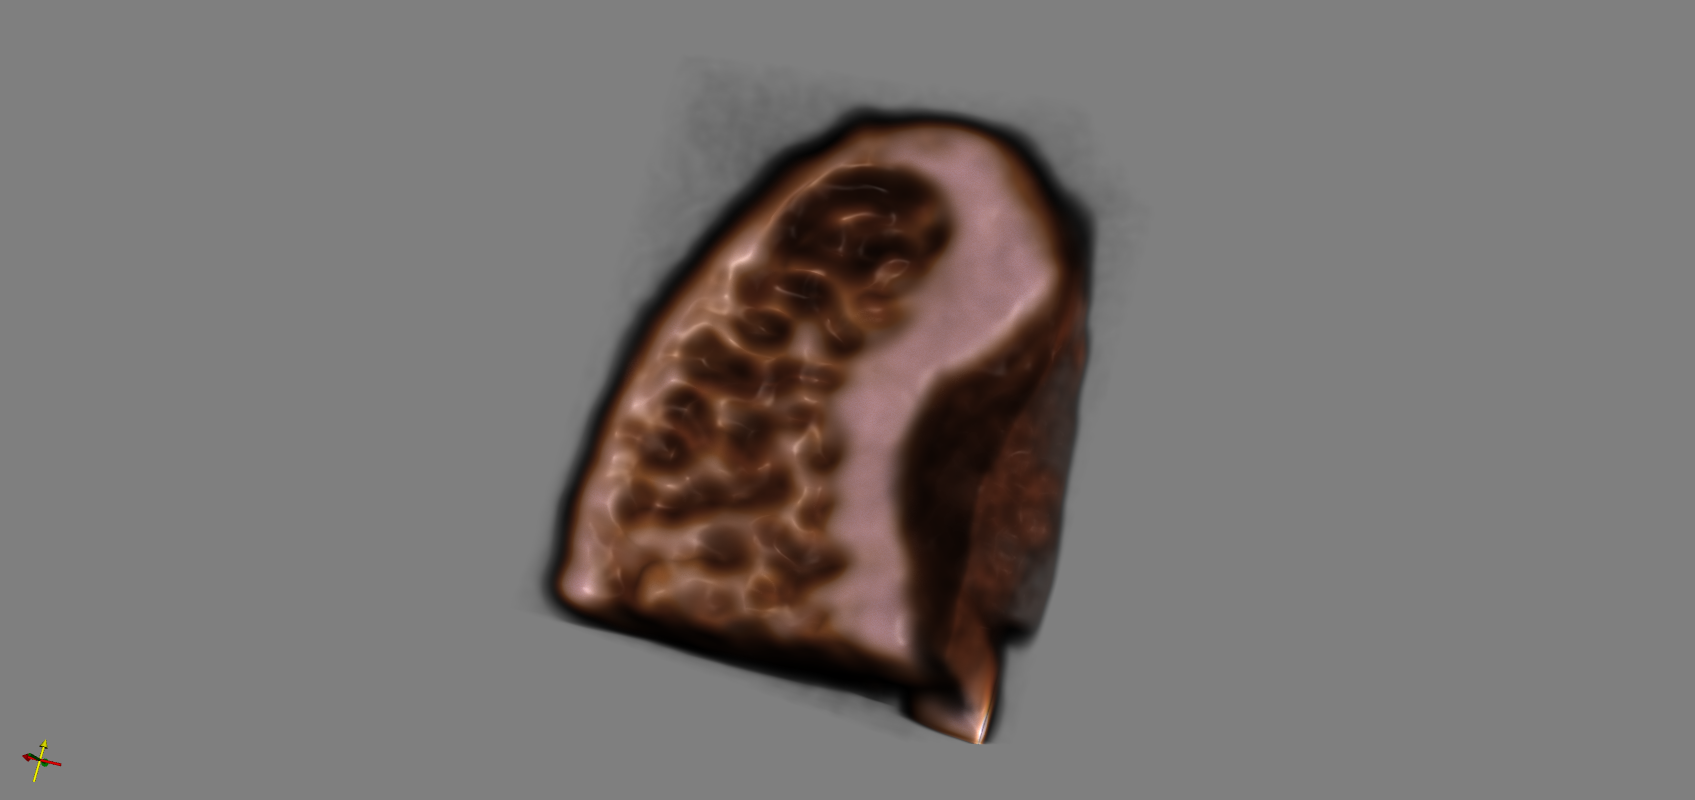
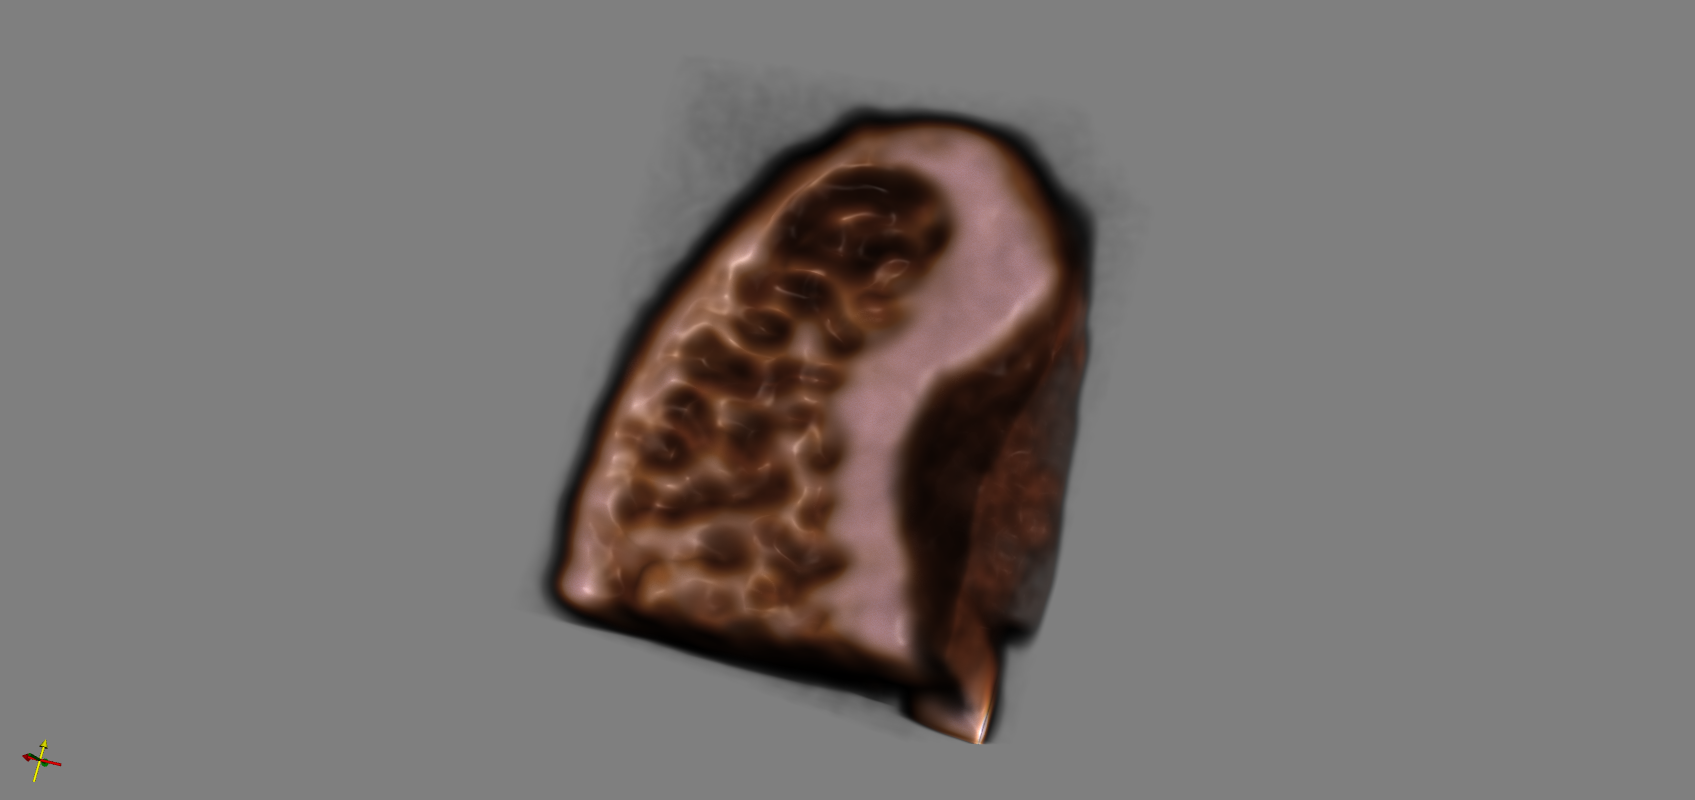

<IPython.core.display.Javascript object>

In [2]:
image = itk.imread("data/Scan_CBCT_13R.nrrd", itk.ctype("signed short"))
view(image, mode="z")


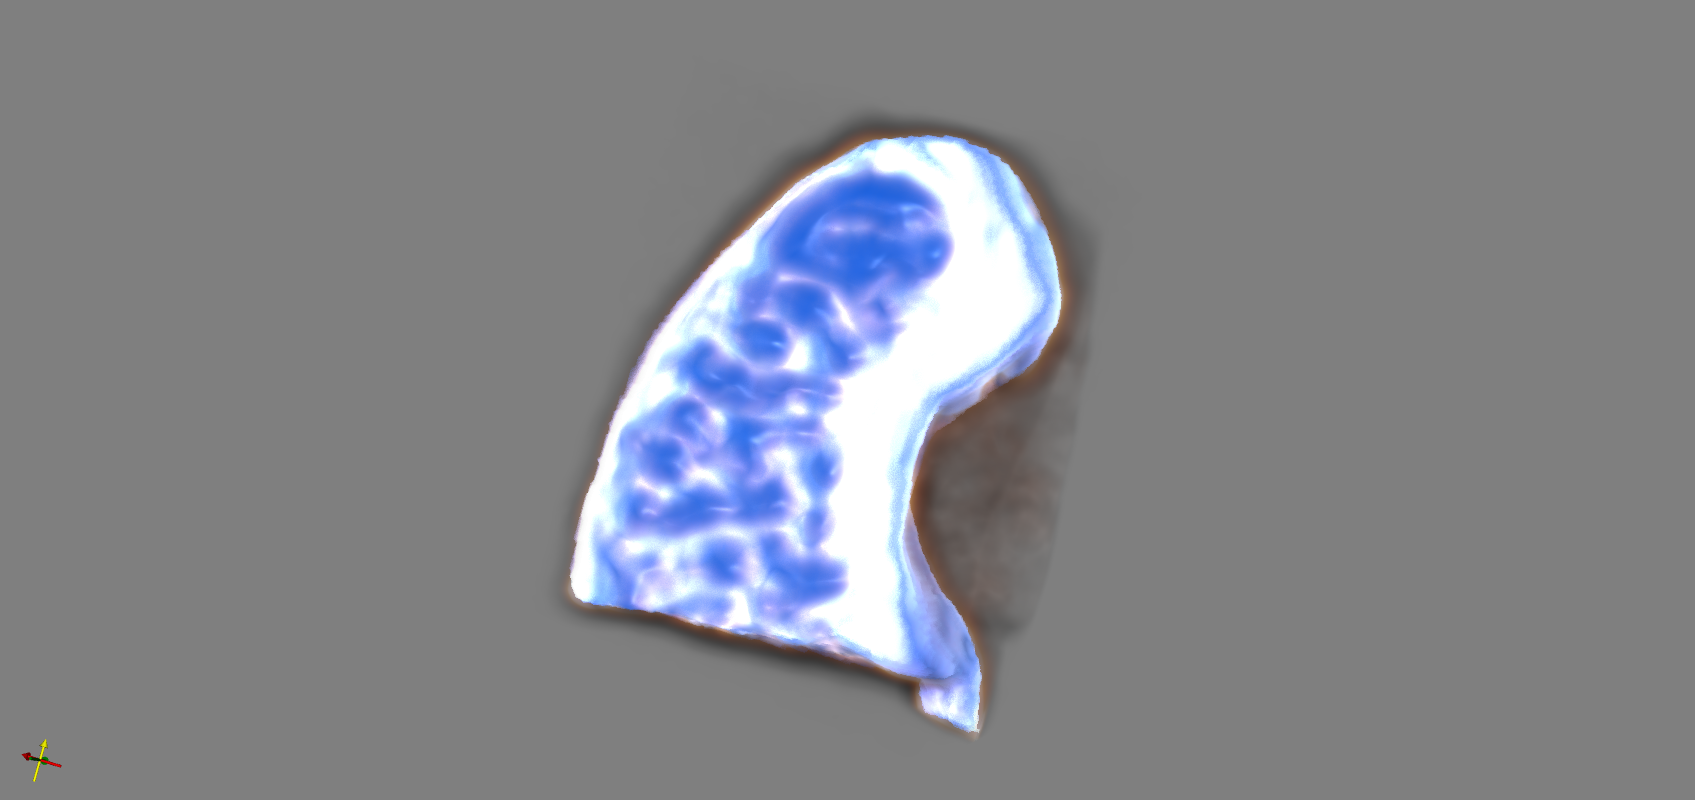
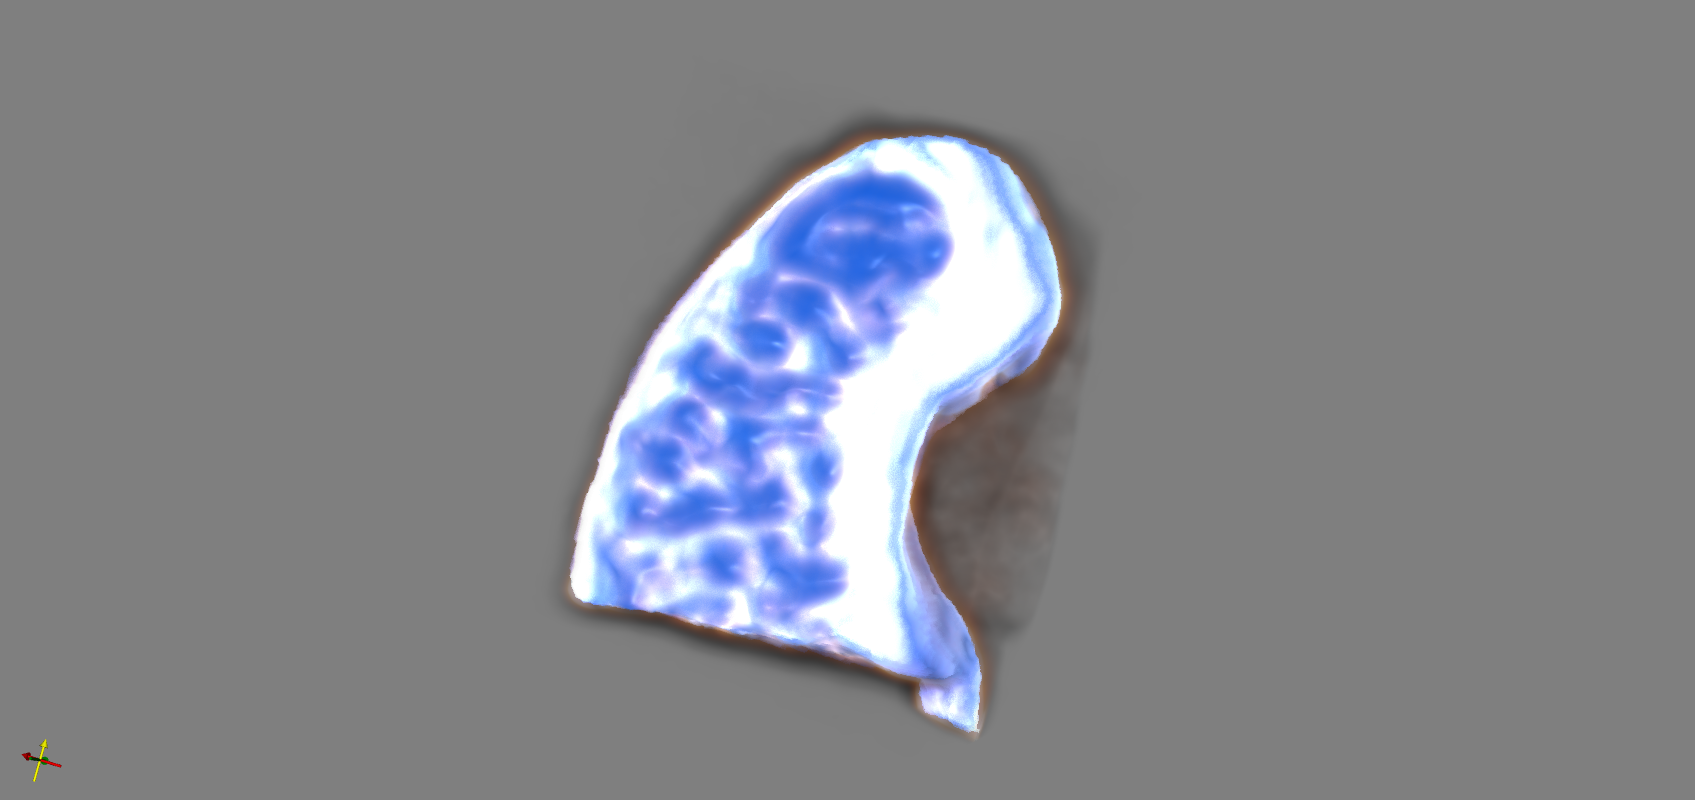

<IPython.core.display.Javascript object>

In [4]:
mask = itk.imread("data/SegmC_CBCT_13R.nrrd", itk.ctype("unsigned char"))
view(image, label_image=mask)

In [ ]:
# %load solutions/7_Extending_the_toolkit_exercise.py

### Enjoy ITK!